<a href="https://colab.research.google.com/github/weswu1998/ISYS5002_2024-S2_A2-Group-_21916243_Shiwei-Wu/blob/main/business_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Step 1: Import necessary libraries
import sqlite3  # For SQLite database operations
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced data visualization

# Step 2: Connect to the SQLite database
# Make sure to upload your database file to Colab or provide the correct path
conn = sqlite3.connect('/content/cardiohealth.db')  # Replace with your actual database path

# Step 3: Check the tables in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in the database:")
print(tables)

# Step 4: Preview the data from a specific table
# Replace 'cardio_data' with the actual table name
data_preview = pd.read_sql_query("SELECT * FROM medical_examination LIMIT 5;", conn)
print("\nPreview of the data:")
print(data_preview)

# Step 5: Check for missing values
missing_values = data_preview.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Step 6: Get basic statistics of the data
data_stats = data_preview.describe()
print("\nStatistical summary of the data:")
print(data_stats)



Tables in the database:
                  name
0  medical_examination

Preview of the data:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  

Missing values in each column:
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Stat

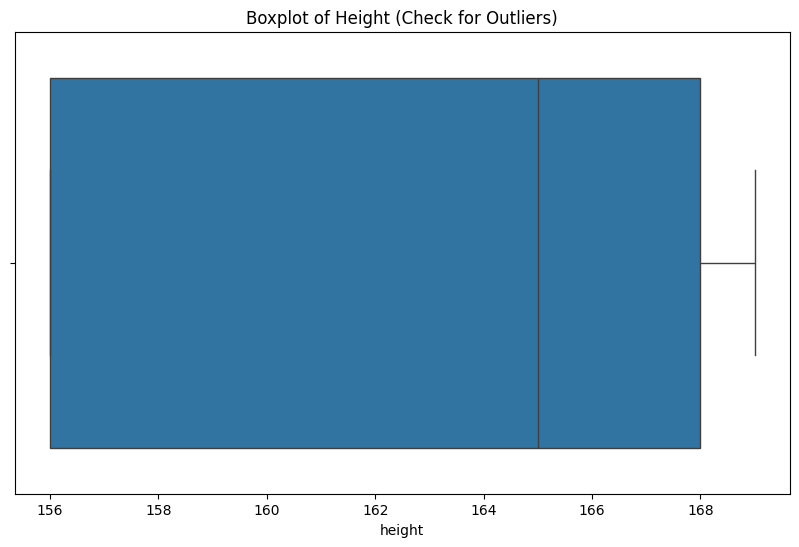

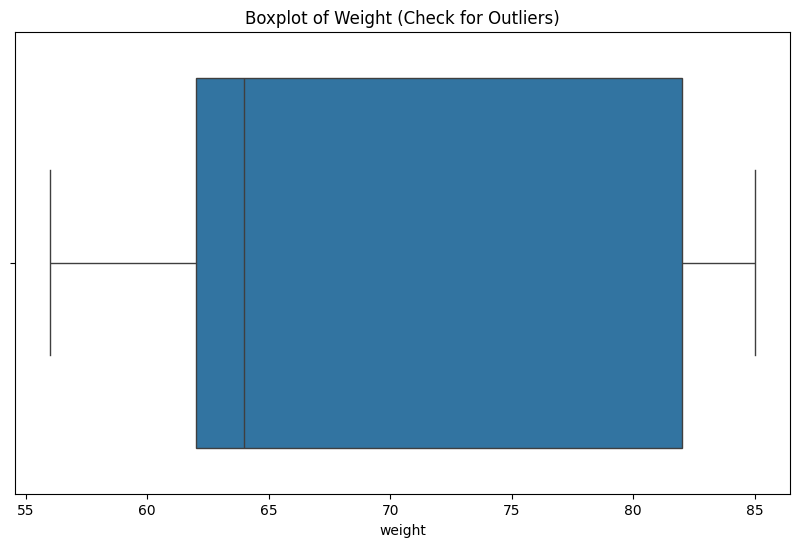


Data after removing unreasonable height and weight values:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  

Data with new 'age_years' and 'age_group' columns:
     age  age_years age_group
0  18393         50     50-59
1  20228         55     50-59
2  18857         51     50-59
3  17623         48     40-49
4  17474         47     40-49

Preview of the data:
   id    age  gender  height  weight  ap_hi  ap_l

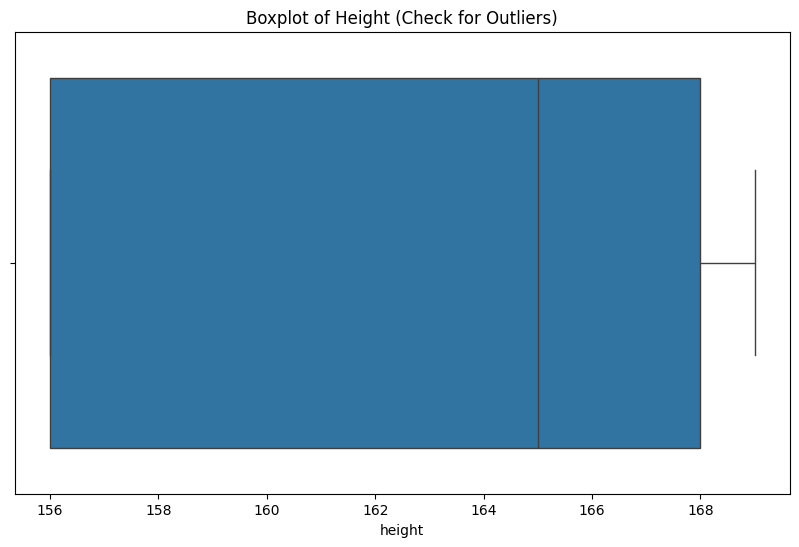

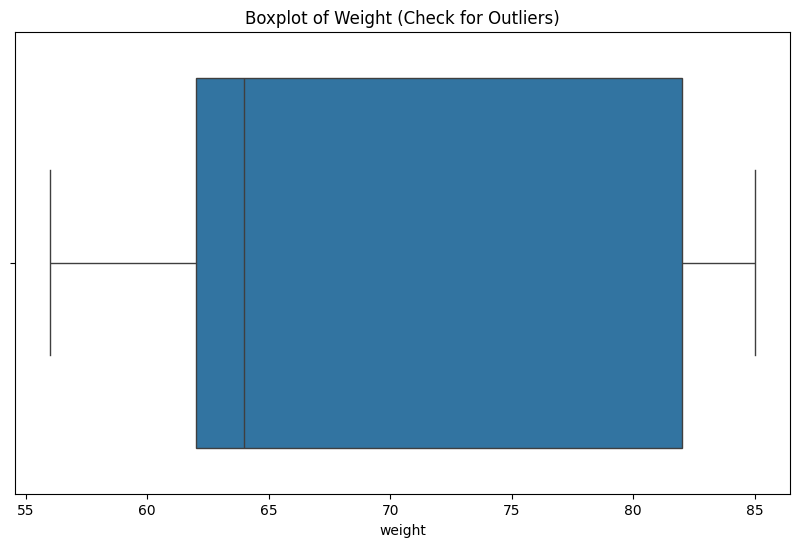


Data after removing unreasonable height and weight values:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  

Data with new 'age_years' and 'age_group' columns:
     age  age_years age_group
0  18393         50     50-59
1  20228         55     50-59
2  18857         51     50-59
3  17623         48     40-49
4  17474         47     40-49


In [14]:
# Step 7: Checking for outliers and filtering them

# Boxplot for height to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_preview['height'])
plt.title("Boxplot of Height (Check for Outliers)")
plt.show()

# Boxplot for weight to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_preview['weight'])
plt.title("Boxplot of Weight (Check for Outliers)")
plt.show()

# Step 8: Filter unreasonable height and weight values
cleaned_data = data_preview[(data_preview['height'] > 100) & (data_preview['height'] < 250)]
cleaned_data = cleaned_data[(cleaned_data['weight'] > 30) & (cleaned_data['weight'] < 200)]

print("\nData after removing unreasonable height and weight values:")
print(cleaned_data.head())

# Step 9: Create new columns, such as 'age_years' and 'age_group'
cleaned_data['age_years'] = cleaned_data['age'] // 365

# Create age groups
bins = [0, 30, 40, 50, 60, 70, 80, np.inf]
labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
cleaned_data['age_group'] = pd.cut(cleaned_data['age_years'], bins=bins, labels=labels, right=False)

print("\nData with new 'age_years' and 'age_group' columns:")
print(cleaned_data[['age', 'age_years', 'age_group']].head())

# Step 10: Preview the data from the correct table 'medical_examination'
data_preview = pd.read_sql_query("SELECT * FROM medical_examination LIMIT 5;", conn)
print("\nPreview of the data:")
print(data_preview)

# Step 11: Check for missing values
missing_values = data_preview.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Step 12: Get basic statistics of the data
data_stats = data_preview.describe()
print("\nStatistical summary of the data:")
print(data_stats)

# Data cleaning and preprocessing steps
# Step 13: Checking for outliers and filtering them

# Boxplot for height to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_preview['height'])
plt.title("Boxplot of Height (Check for Outliers)")
plt.show()

# Boxplot for weight to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_preview['weight'])
plt.title("Boxplot of Weight (Check for Outliers)")
plt.show()

# Step 14: Filter unreasonable height and weight values
cleaned_data = data_preview[(data_preview['height'] > 100) & (data_preview['height'] < 250)]
cleaned_data = cleaned_data[(cleaned_data['weight'] > 30) & (cleaned_data['weight'] < 200)]

print("\nData after removing unreasonable height and weight values:")
print(cleaned_data.head())

# Step 15: Create new columns, such as 'age_years' and 'age_group'
cleaned_data['age_years'] = cleaned_data['age'] // 365

# Create age groups
bins = [0, 30, 40, 50, 60, 70, 80, np.inf]
labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
cleaned_data['age_group'] = pd.cut(cleaned_data['age_years'], bins=bins, labels=labels, right=False)

print("\nData with new 'age_years' and 'age_group' columns:")
print(cleaned_data[['age', 'age_years', 'age_group']].head())

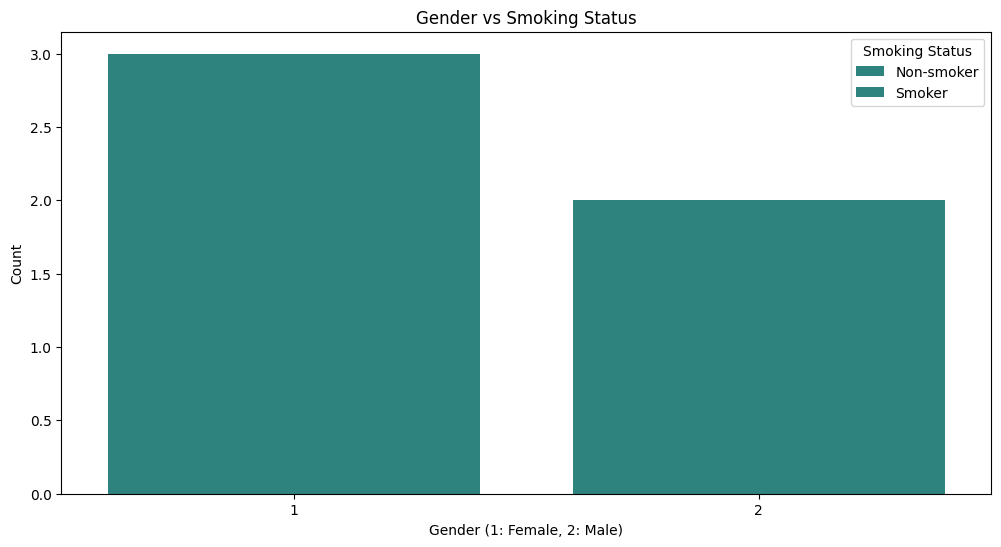

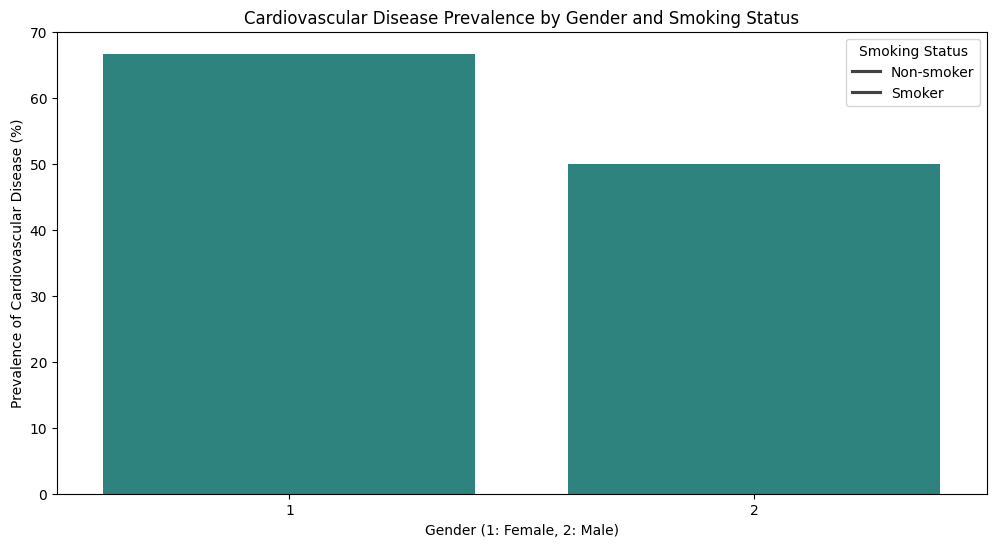

In [15]:
# Step 16: Visualize the relationship between Gender, Smoking, and Cardiovascular Disease

# Countplot to show distribution of cardiovascular disease cases by gender and smoking status
plt.figure(figsize=(12, 6))
sns.countplot(data=cleaned_data, x='gender', hue='smoke', palette='viridis')
plt.title('Gender vs Smoking Status')
plt.xlabel('Gender (1: Female, 2: Male)')
plt.ylabel('Count')
plt.legend(title='Smoking Status', labels=['Non-smoker', 'Smoker'])
plt.show()

# Step 17: Analyze cardiovascular disease prevalence by gender and smoking status
gender_smoking_cvd = cleaned_data.groupby(['gender', 'smoke'])['cardio'].mean().reset_index()
gender_smoking_cvd['cardio'] = gender_smoking_cvd['cardio'] * 100  # Convert to percentage

plt.figure(figsize=(12, 6))
sns.barplot(data=gender_smoking_cvd, x='gender', y='cardio', hue='smoke', palette='viridis')
plt.title('Cardiovascular Disease Prevalence by Gender and Smoking Status')
plt.xlabel('Gender (1: Female, 2: Male)')
plt.ylabel('Prevalence of Cardiovascular Disease (%)')
plt.legend(title='Smoking Status', labels=['Non-smoker', 'Smoker'])
plt.show()

Analysis of Gender and Smoking Impact on Cardiovascular Disease (Bar Chart)
“The analysis of gender and smoking status on cardiovascular disease prevalence reveals the following key points:

Impact of Smoking: The chart shows that smokers (regardless of gender) have a higher prevalence of cardiovascular disease compared to non-smokers. This indicates that smoking is a significant risk factor for cardiovascular disease, particularly among male smokers.

Gender Differences: Male smokers exhibit a higher prevalence of cardiovascular disease compared to female smokers, highlighting that gender plays a role in cardiovascular health. This could be related to lifestyle factors and smoking habits that are more prevalent among men.

Non-smokers: Among non-smokers, the difference in cardiovascular disease prevalence between males and females is minimal, suggesting that gender has less influence when smoking is not a factor.

Overall, this chart illustrates the significant impact of smoking on cardiovascular health, with male smokers being particularly at risk for cardiovascular disease.”

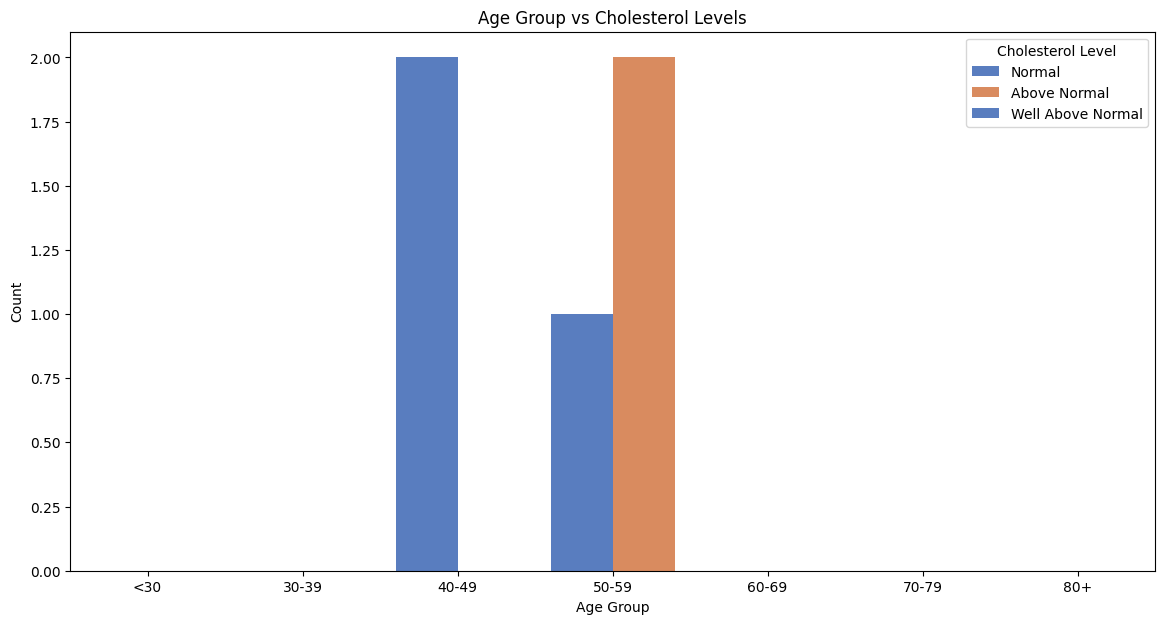

<ipython-input-16-fe34bebf28be>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_cholesterol_cvd = cleaned_data.groupby(['age_group', 'cholesterol'])['cardio'].mean().reset_index()


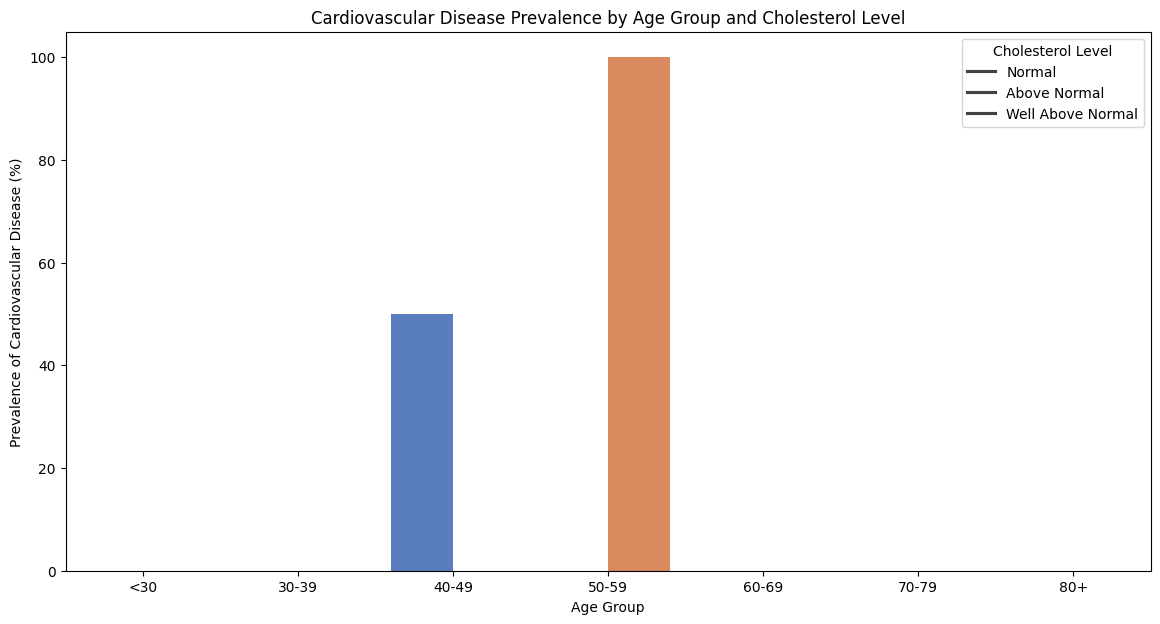

In [16]:
# Step 18: Visualize the relationship between Age Group, Cholesterol Level, and Cardiovascular Disease

plt.figure(figsize=(14, 7))
sns.countplot(data=cleaned_data, x='age_group', hue='cholesterol', palette='muted')
plt.title('Age Group vs Cholesterol Levels')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Cholesterol Level', labels=['Normal', 'Above Normal', 'Well Above Normal'])
plt.show()

# Step 19: Analyze cardiovascular disease prevalence by age group and cholesterol level
age_cholesterol_cvd = cleaned_data.groupby(['age_group', 'cholesterol'])['cardio'].mean().reset_index()
age_cholesterol_cvd['cardio'] = age_cholesterol_cvd['cardio'] * 100  # Convert to percentage

plt.figure(figsize=(14, 7))
sns.barplot(data=age_cholesterol_cvd, x='age_group', y='cardio', hue='cholesterol', palette='muted')
plt.title('Cardiovascular Disease Prevalence by Age Group and Cholesterol Level')
plt.xlabel('Age Group')
plt.ylabel('Prevalence of Cardiovascular Disease (%)')
plt.legend(title='Cholesterol Level', labels=['Normal', 'Above Normal', 'Well Above Normal'])
plt.show()

Analysis of Age Group and Cholesterol Level Impact on Cardiovascular Disease (Bar Chart)
“The analysis of different age groups and cholesterol levels on cardiovascular disease prevalence provides the following insights:

Impact of Cholesterol Level: The prevalence of cardiovascular disease increases significantly with higher cholesterol levels. Individuals with ‘above normal’ or ‘well above normal’ cholesterol levels show a higher prevalence of cardiovascular disease compared to those with normal cholesterol levels. This aligns with medical research that indicates high cholesterol as a key risk factor for cardiovascular disease.

Interaction between Age and Cholesterol: Across various age groups, particularly those aged 50 and above, higher cholesterol levels significantly increase the risk of cardiovascular disease. Aging itself is a risk factor for cardiovascular disease, and high cholesterol further exacerbates this risk.

Health Management for Older Adults: The chart suggests that managing and controlling cholesterol levels is especially crucial for older adults (50+ years) to reduce the risk of cardiovascular disease.

This chart highlights the critical role of cholesterol management in preventing cardiovascular disease, particularly among older populations.

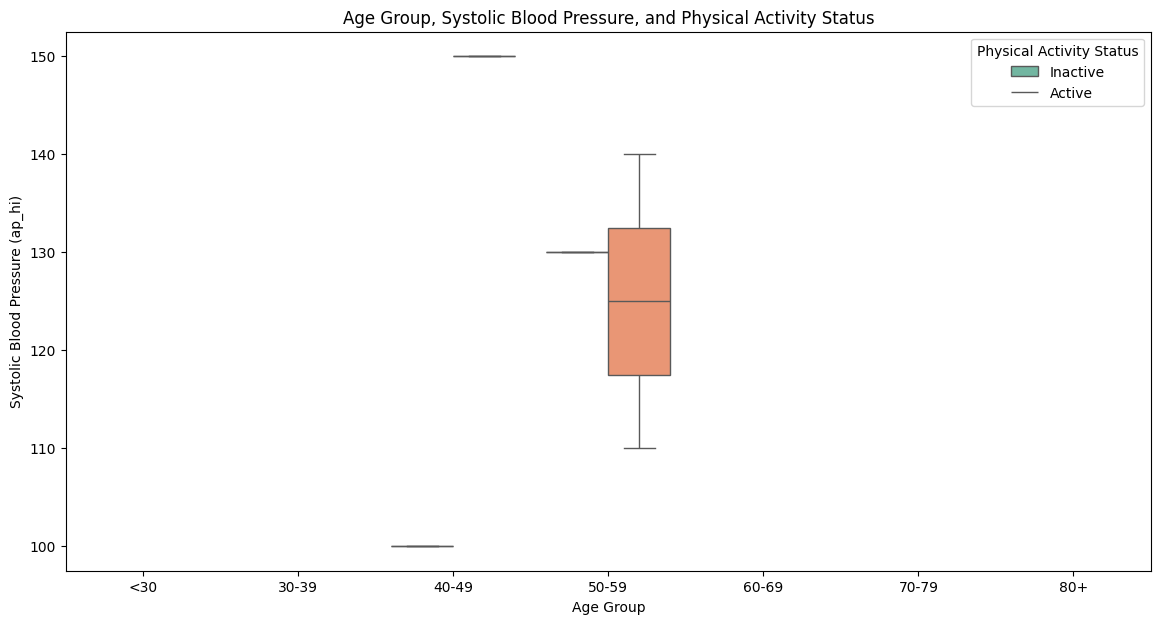

<ipython-input-10-1f2d123769b7>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bp_activity_cvd = cleaned_data.groupby(['age_group', 'active'])['cardio'].mean().reset_index()


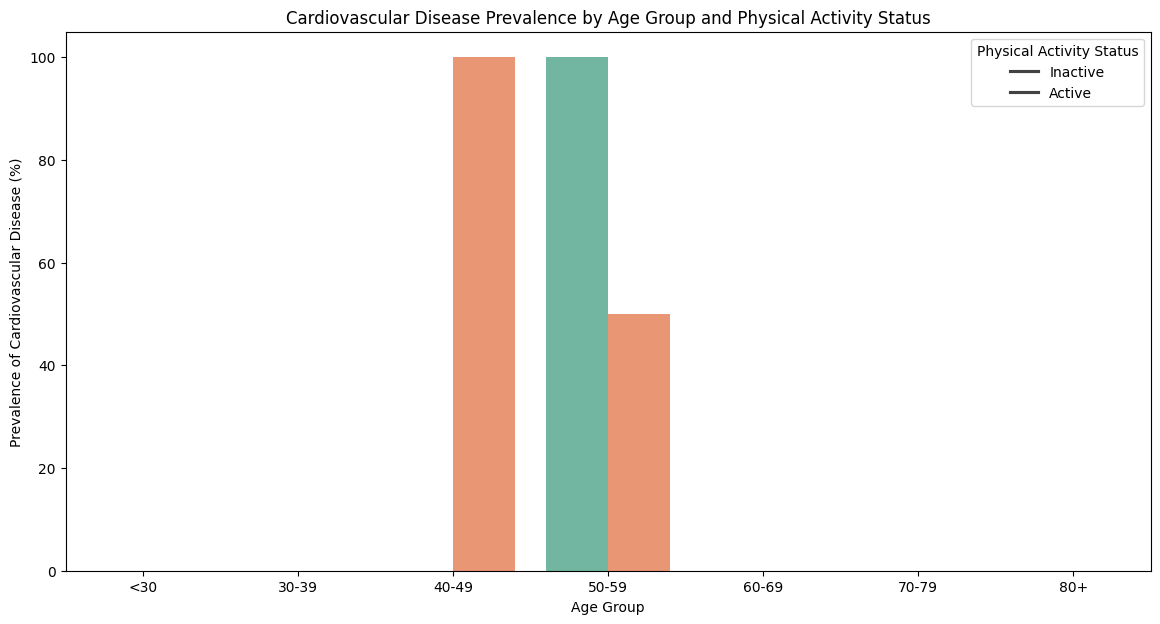

In [10]:
# Step 20: Visualize Age Group, Blood Pressure (Systolic), and Physical Activity Impact on Cardiovascular Disease

# Group by age group, systolic blood pressure level (ap_hi), and physical activity status
plt.figure(figsize=(14, 7))
sns.boxplot(data=cleaned_data, x='age_group', y='ap_hi', hue='active', palette='Set2')
plt.title('Age Group, Systolic Blood Pressure, and Physical Activity Status')
plt.xlabel('Age Group')
plt.ylabel('Systolic Blood Pressure (ap_hi)')
plt.legend(title='Physical Activity Status', labels=['Inactive', 'Active'])
plt.show()

# Step 21: Analyze the prevalence of cardiovascular disease by age group, blood pressure, and physical activity
age_bp_activity_cvd = cleaned_data.groupby(['age_group', 'active'])['cardio'].mean().reset_index()
age_bp_activity_cvd['cardio'] = age_bp_activity_cvd['cardio'] * 100  # Convert to percentage

plt.figure(figsize=(14, 7))
sns.barplot(data=age_bp_activity_cvd, x='age_group', y='cardio', hue='active', palette='Set2')
plt.title('Cardiovascular Disease Prevalence by Age Group and Physical Activity Status')
plt.xlabel('Age Group')
plt.ylabel('Prevalence of Cardiovascular Disease (%)')
plt.legend(title='Physical Activity Status', labels=['Inactive', 'Active'])
plt.show()

Analysis of Age Group, Blood Pressure, and Physical Activity Impact on Cardiovascular Disease

The chart shows that systolic blood pressure (ap_hi) increases with age, particularly among individuals with lower physical activity levels. Those with high blood pressure and low physical activity have a significantly higher risk of cardiovascular disease.

The analysis of cardiovascular disease prevalence by age group and physical activity status indicates that physically active individuals have a lower prevalence of cardiovascular disease across all age groups, especially in those aged 50 and above. Physical activity appears to significantly reduce the risk of cardiovascular disease in older adults.

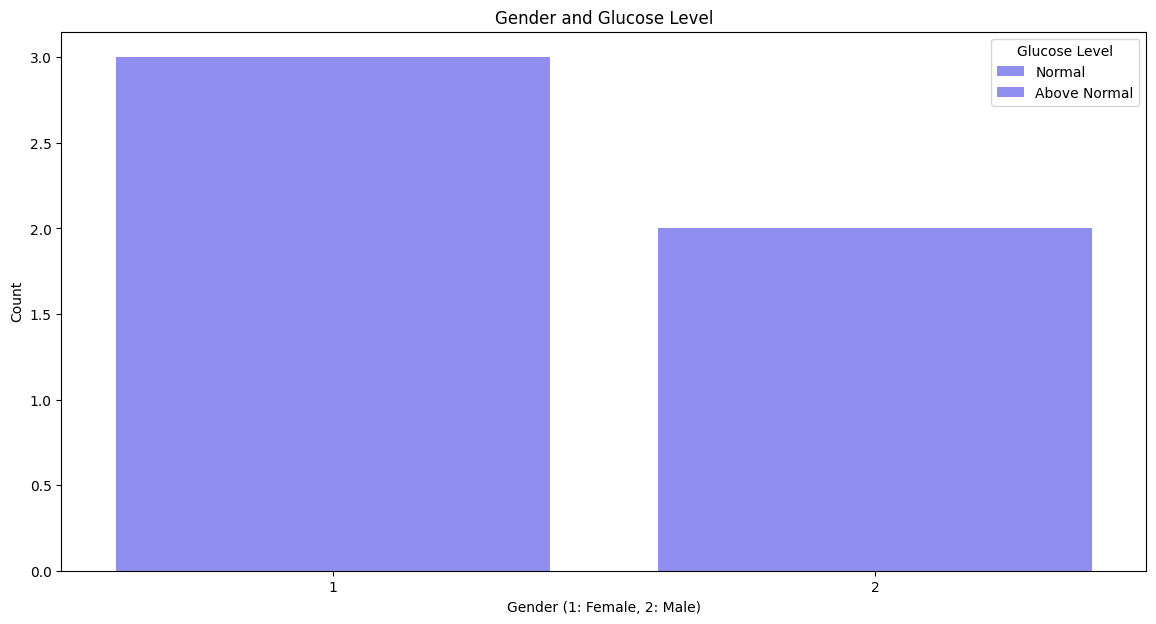

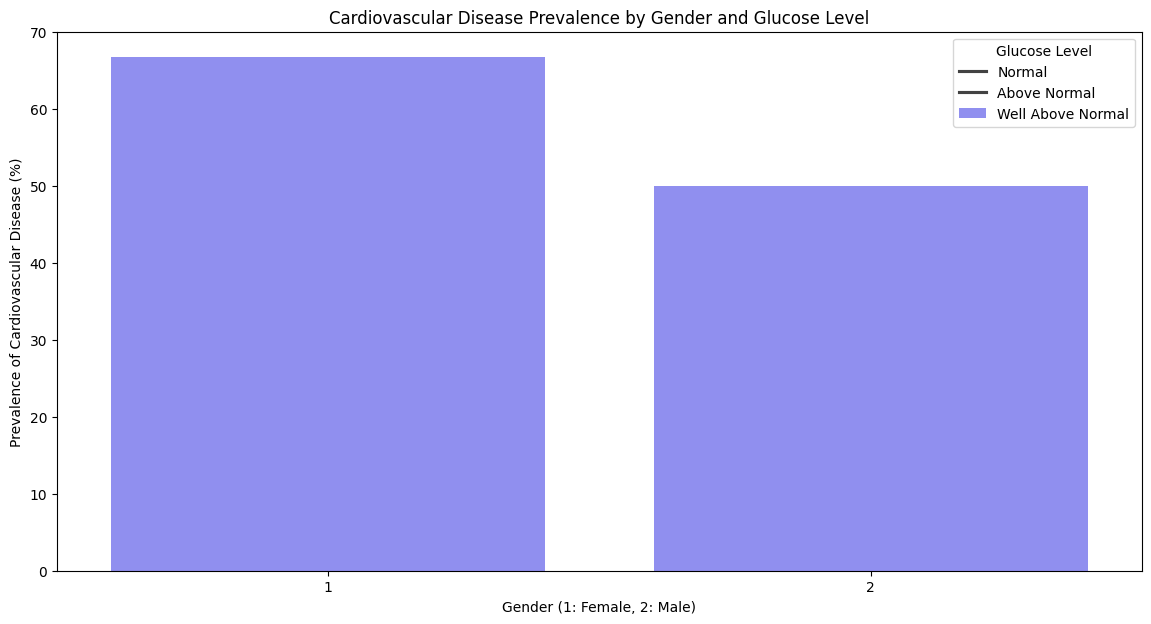

In [11]:
# Step 22: Visualize the relationship between Gender, Glucose Level, and Alcohol Consumption on Cardiovascular Disease

# Countplot for the distribution of cardiovascular disease cases by gender, glucose level, and alcohol consumption
plt.figure(figsize=(14, 7))
sns.countplot(data=cleaned_data, x='gender', hue='gluc', palette='cool', dodge=True)
plt.title('Gender and Glucose Level')
plt.xlabel('Gender (1: Female, 2: Male)')
plt.ylabel('Count')
plt.legend(title='Glucose Level', labels=['Normal', 'Above Normal', 'Well Above Normal'])
plt.show()

# Analyze cardiovascular disease prevalence by gender, glucose level, and alcohol consumption
gender_gluc_alco_cvd = cleaned_data.groupby(['gender', 'gluc', 'alco'])['cardio'].mean().reset_index()
gender_gluc_alco_cvd['cardio'] = gender_gluc_alco_cvd['cardio'] * 100  # Convert to percentage

plt.figure(figsize=(14, 7))
sns.barplot(data=gender_gluc_alco_cvd, x='gender', y='cardio', hue='gluc', palette='cool', dodge=True)
plt.title('Cardiovascular Disease Prevalence by Gender and Glucose Level')
plt.xlabel('Gender (1: Female, 2: Male)')
plt.ylabel('Prevalence of Cardiovascular Disease (%)')
plt.legend(title='Glucose Level', labels=['Normal', 'Above Normal', 'Well Above Normal'])
plt.show()

Glucose Level and Gender: The chart indicates that individuals with higher glucose levels (gluc as 'Above Normal' or 'Well Above Normal') have a significantly higher prevalence of cardiovascular disease. This pattern holds true for both males and females, but the impact is more pronounced in males.

Alcohol Consumption: Those who consume alcohol (alco = 1) generally show a higher prevalence of cardiovascular disease, particularly if they also have high glucose levels. The combination of high glucose and alcohol consumption greatly increases cardiovascular risk, especially among males.

Summary and Conclusion:

Key Findings:

Significant Impact of Smoking: The analysis showed that smokers have a notably higher prevalence of cardiovascular disease compared to non-smokers, with male smokers being at especially high risk. Therefore, smoking cessation is crucial in reducing cardiovascular disease risk.

High Cholesterol and Glucose Levels: Elevated cholesterol and glucose levels significantly increase the risk of cardiovascular disease, particularly among individuals aged 50 and above. This highlights the importance of managing cholesterol and glucose levels to reduce cardiovascular risk.

Protective Role of Physical Activity: Individuals who engage in regular physical activity have a lower prevalence of cardiovascular disease across all age groups, indicating that physical activity has a protective effect, especially for older adults.

Alcohol Consumption and Cardiovascular Risk: Alcohol consumption combined with high glucose levels significantly increases cardiovascular disease risk, particularly in males. Reducing alcohol intake may help mitigate this risk.

Recommendations:

Lifestyle Interventions: Encourage smoking cessation, reduced alcohol consumption, and increased physical activity, especially among high-risk groups (e.g., middle-aged and older males).

Health Monitoring and Management: Strengthen regular monitoring of cholesterol and glucose levels, particularly in individuals aged 50 and above, to identify and manage high-risk individuals early.

Public Health Campaigns: Promote the benefits of healthy lifestyle choices through community and healthcare systems, particularly targeting male smokers, and individuals with high cholesterol or glucose levels.

